In [52]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [84]:
#load data
data = pd.read_csv("raw-DJE.txt")

In [85]:
data.head()

,Ticker,Per,Date,Time,Open,High,Low,Close,Vol
0,DSX,1,20100104,190100,2976.09,2979.67,2976.09,2979.67,0
1,DSX,1,20100104,190200,2982.56,2987.25,2982.56,2987.25,0
2,DSX,1,20100104,190300,2986.57,2987.35,2986.11,2987.35,0
3,DSX,1,20100104,190400,2989.59,2989.59,2986.83,2986.83,0
4,DSX,1,20100104,190500,2986.86,2987.58,2986.86,2987.17,0


In [86]:
data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)

In [87]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data['Time'] = pd.to_datetime(data['Time'], unit='s')

In [88]:
data['Date'] = data['Date'] + pd.to_timedelta(data['Time'].dt.strftime('%H:%M:%S'))

In [89]:
data['Date'] 

0        2010-01-04 04:48:20
1        2010-01-04 04:50:00
2        2010-01-04 04:51:40
3        2010-01-04 04:53:20
4        2010-01-04 04:55:00
                 ...        
260058   2011-12-31 14:58:20
260059   2011-12-31 17:03:20
260060   2011-12-31 01:26:40
260061   2012-01-01 01:26:40
260062   2012-01-01 02:05:00
Name: Date, Length: 260063, dtype: datetime64[ns]

In [96]:
data = data.sort_values(by=["Date"])
if "Close" in data.columns: 
    data.rename(columns={"Close": "Price"}, inplace = True)
data.High = data.High
data.Low = data.Low
data.Open = data.Open
if "Vol" in data.columns: 
    ata = data.drop("Vol", axis = 1)
if "Time" in data.columns:
    data = data.drop("Time", axis = 1)

In [97]:
special_data = pd.DataFrame(data)

In [98]:
special_data = data[(data['Date'] > '2010-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [99]:
#change indexes
special_data.set_index('Date', inplace = True)

In [100]:
data.head(10)

,Ticker,Per,Date,Open,High,Low,Price
0,DSX,1,2010-01-04 04:48:20,2976.09,2979.67,2976.09,2979.67
1,DSX,1,2010-01-04 04:50:00,2982.56,2987.25,2982.56,2987.25
2,DSX,1,2010-01-04 04:51:40,2986.57,2987.35,2986.11,2987.35
3,DSX,1,2010-01-04 04:53:20,2989.59,2989.59,2986.83,2986.83
4,DSX,1,2010-01-04 04:55:00,2986.86,2987.58,2986.86,2987.17
5,DSX,1,2010-01-04 04:56:40,2986.27,2988.37,2986.27,2988.37
6,DSX,1,2010-01-04 04:58:20,2987.42,2989.95,2987.42,2989.95
7,DSX,1,2010-01-04 05:00:00,2989.96,2990.60,2989.96,2990.60
8,DSX,1,2010-01-04 05:01:40,2990.36,2991.12,2990.36,2990.85
9,DSX,1,2010-01-04 05:03:20,2992.20,2992.20,2991.21,2991.21


In [101]:
special_data.head(10)

,Ticker,Per,Open,High,Low,Price
Date,,,,,,
2010-01-04 04:48:20,DSX,1,2976.09,2979.67,2976.09,2979.67
2010-01-04 04:50:00,DSX,1,2982.56,2987.25,2982.56,2987.25
2010-01-04 04:51:40,DSX,1,2986.57,2987.35,2986.11,2987.35
2010-01-04 04:53:20,DSX,1,2989.59,2989.59,2986.83,2986.83
2010-01-04 04:55:00,DSX,1,2986.86,2987.58,2986.86,2987.17
2010-01-04 04:56:40,DSX,1,2986.27,2988.37,2986.27,2988.37
2010-01-04 04:58:20,DSX,1,2987.42,2989.95,2987.42,2989.95
2010-01-04 05:00:00,DSX,1,2989.96,2990.60,2989.96,2990.60
2010-01-04 05:01:40,DSX,1,2990.36,2991.12,2990.36,2990.85


In [102]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()

,Ticker,Per,Open,High,Low,Price,new_index,new_date
Date,,,,,,,,
2010-01-04 04:48:20,DSX,1,2976.09,2979.67,2976.09,2979.67,2979.67,2979.67
2010-01-04 04:50:00,DSX,1,2982.56,2987.25,2982.56,2987.25,2987.25,2987.25
2010-01-04 04:51:40,DSX,1,2986.57,2987.35,2986.11,2987.35,2987.35,2987.35
2010-01-04 04:53:20,DSX,1,2989.59,2989.59,2986.83,2986.83,2986.83,2986.83
2010-01-04 04:55:00,DSX,1,2986.86,2987.58,2986.86,2987.17,2987.17,2987.17


In [103]:
import datetime

special_data.new_index[0] = 1262563200
special_data.new_date[0] = datetime.datetime.fromtimestamp(special_data.new_index[0]).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.new_index[i] = special_data.new_index[i - 1] + 86400
        special_data.new_date[i] = datetime.datetime.fromtimestamp(special_data.new_index[i]).strftime('%Y-%m-%d %H:%M:%S')

In [104]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [105]:
special_data.head(20)

,Ticker,Per,Open,High,Low,Price,new_index
new_date,,,,,,,
2010-01-04 07:00:00,DSX,1,2976.09,2979.67,2976.09,2979.67,1.262563e+09
2010-01-05 07:00:00,DSX,1,2982.56,2987.25,2982.56,2987.25,1.262650e+09
2010-01-06 07:00:00,DSX,1,2986.57,2987.35,2986.11,2987.35,1.262736e+09
2010-01-07 07:00:00,DSX,1,2989.59,2989.59,2986.83,2986.83,1.262822e+09
2010-01-08 07:00:00,DSX,1,2986.86,2987.58,2986.86,2987.17,1.262909e+09
2010-01-09 07:00:00,DSX,1,2986.27,2988.37,2986.27,2988.37,1.262995e+09
2010-01-10 07:00:00,DSX,1,2987.42,2989.95,2987.42,2989.95,1.263082e+09
2010-01-11 07:00:00,DSX,1,2989.96,2990.60,2989.96,2990.60,1.263168e+09
2010-01-12 07:00:00,DSX,1,2990.36,2991.12,2990.36,2990.85,1.263254e+09


In [106]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)

<AxesSubplot: xlabel='new_date'>

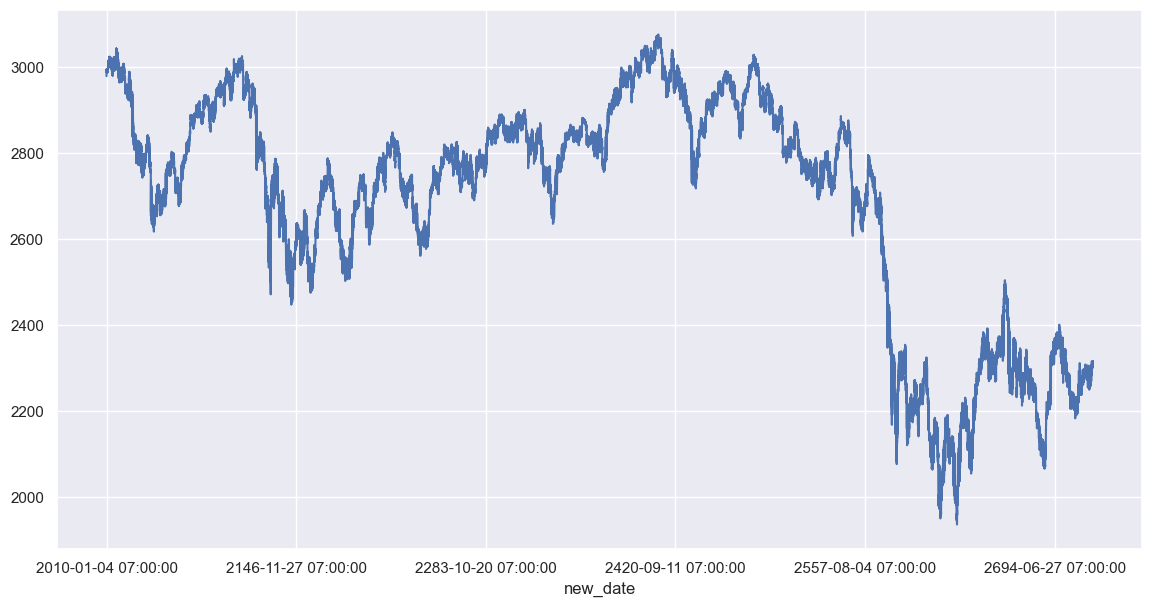

In [107]:
special_data.Close.plot()